In [1]:
import os
import torch
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.autolayout': True})

from data.toy_data.hyperbolic import hyperbolic
from data.toy_data.circle import circle

from src.diffeomorphisms.vanilla_hyperboloid import Vanilla_into_Hyperboloid
from src.diffeomorphisms.vanilla_sphere import Vanilla_into_Sphere
from src.manifolds.pull_back_manifold import PullBackManifold
from src.riemannian_autoencoder import Curvature_Corrected_Riemannian_Autoencoder
from src.riemannian_autoencoder.low_rank_approximation.naive_tsvd import naive_low_rank_approximation

# set seed
torch.manual_seed(31)

results_path = os.path.join("results")

In [2]:
# data parameters
num_data = 21
noise = 0.02

# plot options
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

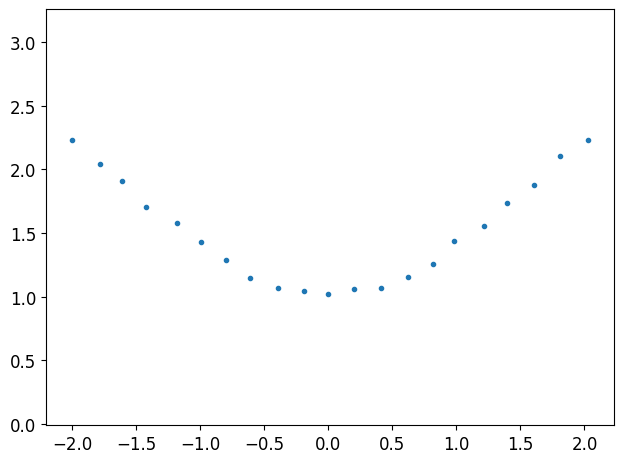

In [3]:
# Construct data
h_data = hyperbolic(num_data, noise=noise)
h_data_manifold = hyperbolic(250, noise=0.)

plt.plot(h_data[:,0], h_data[:,1], '.')
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"h_data.eps"))
plt.show()

In [4]:
# construct hyperbolic pullback manifold
h_offset = torch.zeros((2,))
h_orthogonal = torch.eye(2,2)
h_diffeo = Vanilla_into_Hyperboloid(2, h_offset, h_orthogonal)

h_M = PullBackManifold(h_diffeo)

In [5]:
# choose special points
h_z1 = h_data[0][None]
h_z2 = h_data[-1][None]
h_z3 = torch.tensor([0., 1.])[None]

In [6]:
# geodesic interpolation
h_data_gamma_12_t = hyperbolic(250, noise=0.)
h_adjacent_distances = torch.norm(h_data_gamma_12_t[1:] - h_data_gamma_12_t[:-1], 2, -1)
h_cumulative_distances = torch.cat((torch.zeros(1), torch.cumsum(h_adjacent_distances, 0)),0)
h_t = h_cumulative_distances / h_cumulative_distances[-1]

h_z1_var = h_z1 + 0.25 * torch.tensor([1.,0.])

h_gamma_12_t =  h_M.geodesic(h_z1, h_z2, h_t)

# compute error
error_h_gamma_12_t = torch.norm(h_gamma_12_t - h_data_gamma_12_t, 2, -1)

# compute geodesics variation
h_gamma_12_var_t =  h_M.geodesic(h_z1_var, h_z2, h_t)

# compute error wrt original geodesic
error_h_gamma_12_var_t = torch.norm(h_gamma_12_var_t - h_gamma_12_t, 2, -1)

/Users/wdiepeveen/Documents/PhD/Projects/10 - Learning Riemannian Geometry/src/article/Pulling-back-symmetric-Riemannian-geometry-for-data-analysis/src/diffeomorphisms/simple_diffeomorphisms/stereographic_hyperboloid.py:30: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3641.)
  output[-1] = torch.sqrt(s_sq.T + 1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


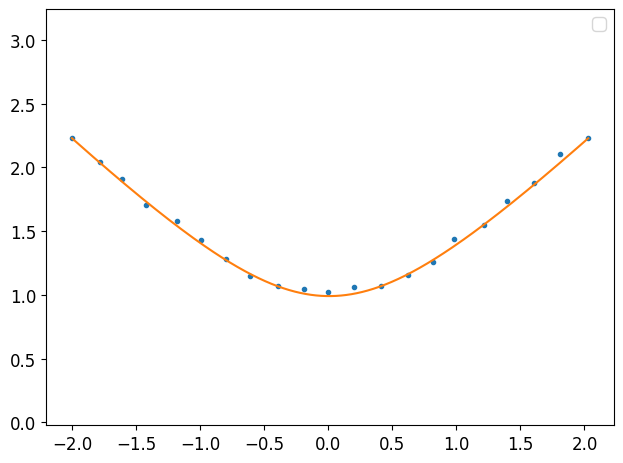

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


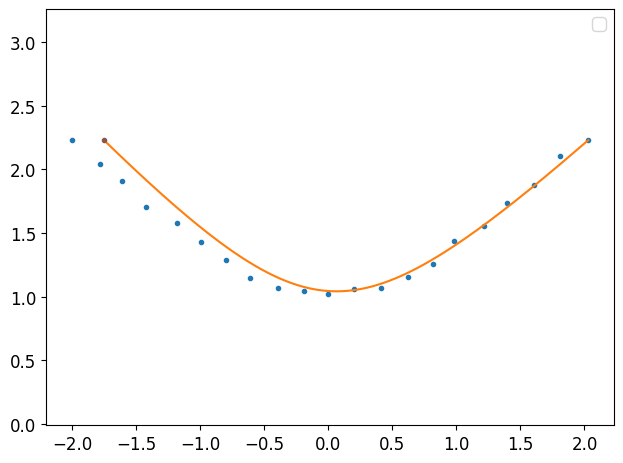

average error = 0.23148012161254883 \pm 0.11272000521421432
average variation error = 0.09133171290159225 \pm 0.053054485470056534


In [7]:
# plot geodesics
plt.plot(h_data[:,0], h_data[:,1], '.')
plt.plot(h_gamma_12_t.squeeze().detach().numpy()[:,0], h_gamma_12_t.squeeze().detach().numpy()[:,1])
        
plt.legend()
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"geodesics_on_h_M.eps"))
plt.show()

# plot geodesic variations
plt.plot(h_data[:,0], h_data[:,1], '.')
plt.plot(h_gamma_12_var_t.squeeze().detach().numpy()[:,0], h_gamma_12_var_t.squeeze().detach().numpy()[:,1])
plt.plot(h_z1_var[:,0], h_z1_var[:,1], '.', color=colors[5])
        
plt.legend()
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"geodesic_variations_on_h_M.eps"))
plt.show()

# print errors
h_mean_error = torch.mean(error_h_gamma_12_t)
h_std_error = torch.std(error_h_gamma_12_t)
print(f"average error = {h_mean_error.squeeze().detach().numpy()} \pm {h_std_error.squeeze().detach().numpy()}")

h_mean_var_error = torch.mean(error_h_gamma_12_var_t)
h_std_var_error = torch.std(error_h_gamma_12_var_t)
print(f"average variation error = {h_mean_var_error.squeeze().detach().numpy()} \pm {h_std_var_error.squeeze().detach().numpy()}")

In [8]:
# barycentre
h_data_var = h_data + 0.05 * torch.randn((num_data, 2))

# compute barycentre
h_barycentre = h_M.barycentre(h_data[None])

# compute error
error_h_barycentre = torch.norm(h_barycentre - torch.tensor([0., 1.]), 2, -1)

# compute geodesics variation
h_barycentre_var =  h_M.barycentre(h_data_var[None])

# compute error wrt original geodesic
error_h_barycentre_var = torch.norm(h_barycentre_var - h_barycentre, 2, -1)

gradient descent was terminated after reaching a relative error 0.0009658673079684377 in 3 iterations
gradient descent was terminated after reaching a relative error 0.0009423954179510474 in 2 iterations


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


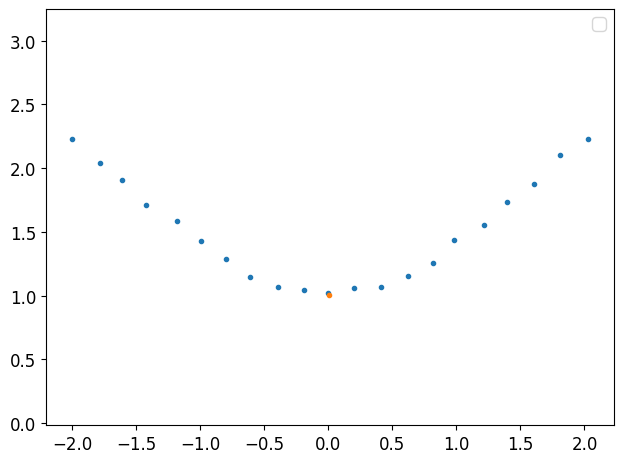

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


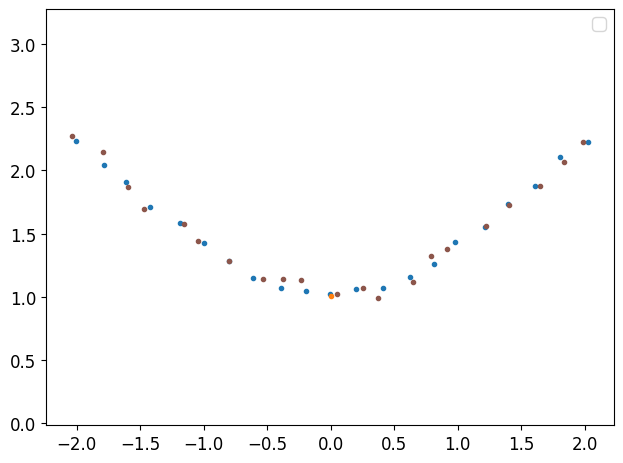

error = 0.002922444138675928
average variation error = 0.003849267726764083


In [9]:
# plot barycentre
plt.plot(h_data[:,0], h_data[:,1], '.')

plt.plot(h_barycentre[:,0].detach().numpy(), h_barycentre[:,1].detach().numpy(), '.')
plt.legend()
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"barycentre_on_h_M.eps"))
plt.show()

plt.plot(h_data[:,0], h_data[:,1], '.')
# print(h_barycentre_var)
plt.plot(h_barycentre_var[:,0].detach().numpy(), h_barycentre_var[:,1].detach().numpy(), '.')
plt.plot(h_data_var[:,0], h_data_var[:,1], '.', color=colors[5])
plt.legend()
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"barycentre_variation_on_h_M.eps"))
plt.show()

# print errors
print(f"error = {error_h_barycentre.squeeze().detach().numpy()}")

print(f"average variation error = {error_h_barycentre_var.squeeze().detach().numpy()}")

In [10]:
# compute logs
h_logs = h_M.log(h_z3, h_data[None])[0]

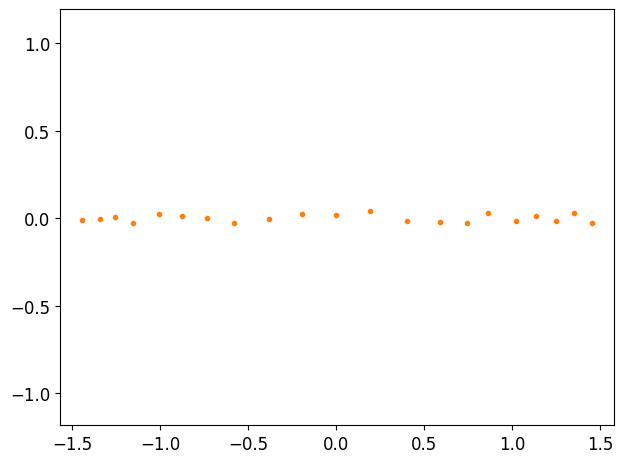

In [11]:
plt.plot(h_logs.squeeze().detach().numpy()[:,0], h_logs.squeeze().detach().numpy()[:,1], '.', color=colors[1])
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"logs_on_h_M.eps"))
plt.show()

In [12]:
# low rank approximation
noisy_h_data = hyperbolic(250, noise=0.25)

h_z = h_z3

# construct CC-RAE from test data

# i) rank 1 approximation
h_R_z, h_U = naive_low_rank_approximation(h_M, h_z, h_data, 1)
h_w_z = h_R_z / h_M.norm(h_z, h_R_z[None])[:,None]

# ii) construct CC-RAE
h_rae_w_z = Curvature_Corrected_Riemannian_Autoencoder(h_M, h_z, h_w_z)

# project noisy validation data onto manifold with RAE
projected_h_mesh = h_rae_w_z.project_on_manifold(noisy_h_data)

# compute error
error_projected_h_mesh = torch.norm(projected_h_mesh - noisy_h_data, 2, -1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


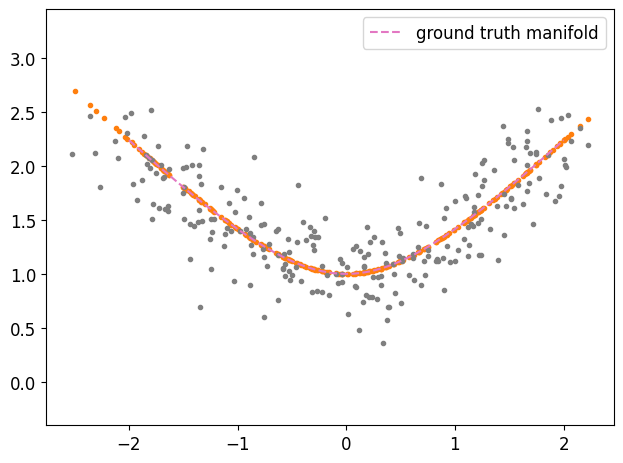

average error = 0.2258264571428299 \pm 0.16776786744594574


In [13]:
# plot rae projections
plt.plot(projected_h_mesh.cpu().detach().numpy()[:,0], projected_h_mesh.cpu().detach().numpy()[:,1], '.', color=colors[1])

plt.plot(noisy_h_data[:,0], noisy_h_data[:,1], '.', color=colors[7])
plt.plot(h_data_manifold[:,0], h_data_manifold[:,1], "--", label="ground truth manifold", color=colors[6])
plt.legend()
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"rae_projections_on_h_M.eps"))
plt.show()

# print errors
mean_h_rae_error = torch.mean(error_projected_h_mesh)
std_h_rae_error = torch.std(error_projected_h_mesh)
print(f"average error = {mean_h_rae_error.squeeze().detach().numpy()} \pm {std_h_rae_error.squeeze().detach().numpy()}")

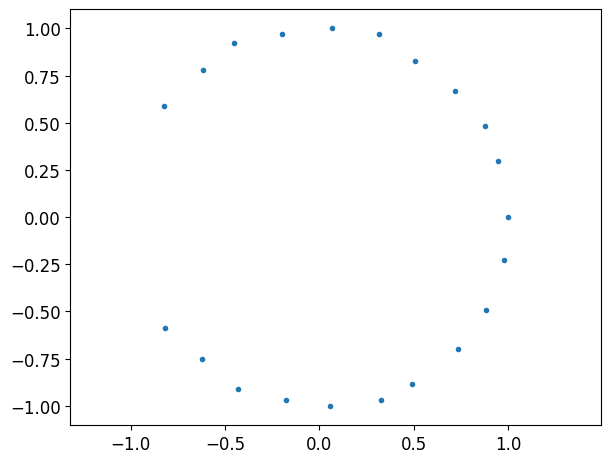

In [14]:
c_data = circle(num_data, noise=noise)
c_data_manifold = circle(250, noise=0.)

plt.plot(c_data[:,0], c_data[:,1], '.')
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"c_data.eps"))
plt.show()

In [15]:
# construct spherical pullback manifold
c_offset = torch.zeros((2,))
c_orthogonal = torch.eye(2,2)
c_diffeo = Vanilla_into_Sphere(2, c_offset, c_orthogonal)

c_M = PullBackManifold(c_diffeo)

In [16]:
# choose special points
c_z1 = c_data[0][None]
c_z2 = c_data[int(4*num_data/7)][None]
c_z3 = c_data[int(num_data/2)][None]
c_z4 = torch.tensor([1., 0.])[None]

In [17]:
# geodesic interpolation
c_data_gamma_12_t = circle(250, noise=0.)
c_adjacent_distances = torch.norm(c_data_gamma_12_t[1:] - c_data_gamma_12_t[:-1], 2, -1)
c_cumulative_distances = torch.cat((torch.zeros(1), torch.cumsum(c_adjacent_distances, 0)),0)
c_t = c_cumulative_distances / c_cumulative_distances[-1]

c_z1_var = c_z1 + 0.25 * torch.tensor([1.,0.])

c_gamma_12_t =  c_M.geodesic(c_z1, c_z2, c_t)

# compute error
error_c_gamma_12_t = torch.norm(c_gamma_12_t - c_data_gamma_12_t, 2, -1)

# compute geodesics variation
c_gamma_12_var_t =  c_M.geodesic(c_z1_var, c_z2, c_t)

# compute error wrt original geodesic
error_c_gamma_12_var_t = torch.norm(c_gamma_12_var_t - c_gamma_12_t, 2, -1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


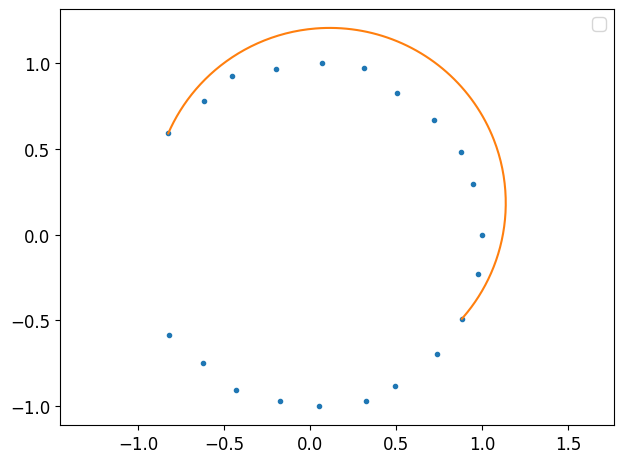

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


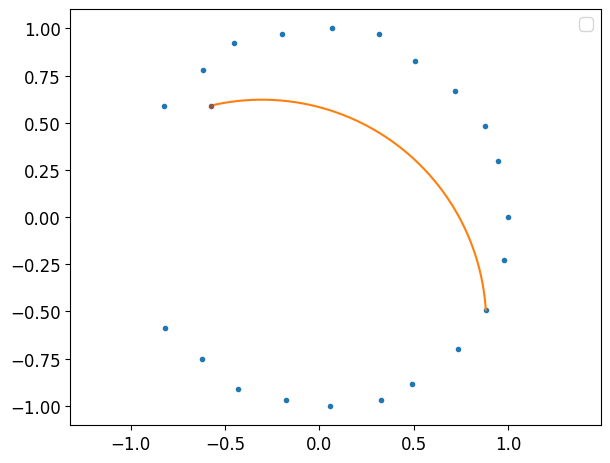

average error = 1.009770393371582 \pm 0.5123293995857239
average variation error = 0.48686978220939636 \pm 0.18934592604637146


In [18]:
# plot geodesics
plt.plot(c_data[:,0], c_data[:,1], '.')
plt.plot(c_gamma_12_t.squeeze().detach().numpy()[:,0], c_gamma_12_t.squeeze().detach().numpy()[:,1])
        
plt.legend()
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"geodesics_on_c_M.eps"))
plt.show()

# plot geodesic variations
plt.plot(c_data[:,0], c_data[:,1], '.')
plt.plot(c_gamma_12_var_t.squeeze().detach().numpy()[:,0], c_gamma_12_var_t.squeeze().detach().numpy()[:,1])
plt.plot(c_z1_var[:,0], c_z1_var[:,1], '.', color=colors[5])

plt.legend()
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"geodesic_variations_on_c_M.eps"))
plt.show()

# print errors
c_mean_error = torch.mean(error_c_gamma_12_t)
c_std_error = torch.std(error_c_gamma_12_t)
print(f"average error = {c_mean_error.squeeze().detach().numpy()} \pm {c_std_error.squeeze().detach().numpy()}")

c_mean_var_error = torch.mean(error_c_gamma_12_var_t)
c_std_var_error = torch.std(error_c_gamma_12_var_t)
print(f"average variation error = {c_mean_var_error.squeeze().detach().numpy()} \pm {c_std_var_error.squeeze().detach().numpy()}")

In [19]:
# barycentre
c_data_var = c_data + 0.05 * torch.randn((num_data, 2))

# compute barycentre
c_barycentre = c_M.barycentre(c_data[None])

# compute error
error_c_barycentre = torch.norm(c_barycentre - torch.tensor([1., 0.]), 2, -1)

# compute geodesics variation
c_barycentre_var =  c_M.barycentre(c_data_var[None])

# compute error wrt original geodesic
error_c_barycentre_var = torch.norm(c_barycentre_var - c_barycentre, 2, -1)

gradient descent was terminated after reaching a relative error 0.0007930092979222536 in 26 iterations
gradient descent was terminated after reaching a relative error 0.0009914274560287595 in 113 iterations


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


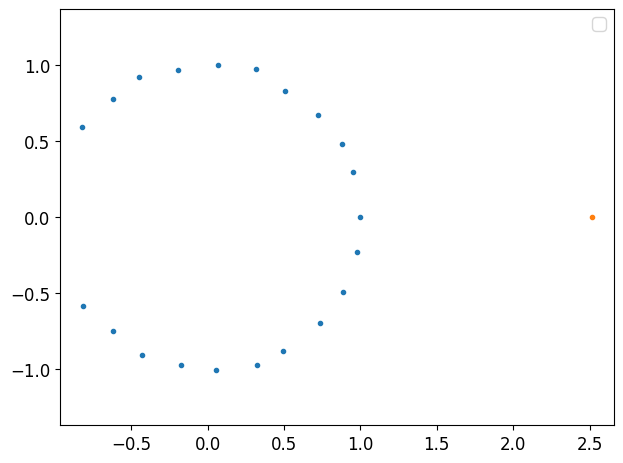

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


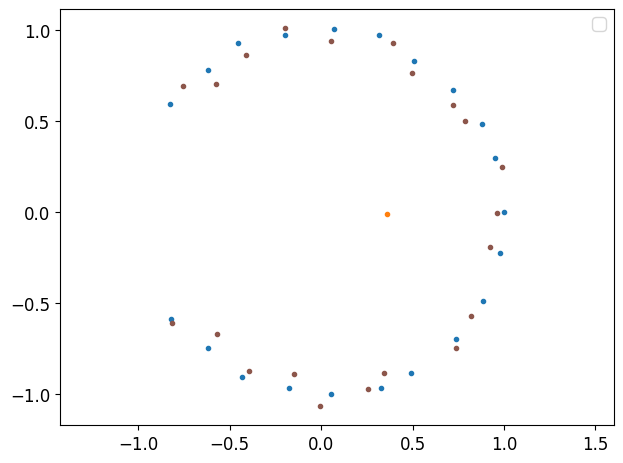

error = 1.5171563625335693
average variation error = 2.1553637981414795


In [20]:
# plot barycentre
plt.plot(c_data[:,0], c_data[:,1], '.')

plt.plot(c_barycentre[:,0].detach().numpy(), c_barycentre[:,1].detach().numpy(), '.')
plt.legend()
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"barycentre_on_c_M.eps"))
plt.show()

plt.plot(c_data[:,0], c_data[:,1], '.')
plt.plot(c_barycentre_var[:,0].detach().numpy(), c_barycentre_var[:,1].detach().numpy(), '.')
plt.plot(c_data_var[:,0], c_data_var[:,1], '.', color=colors[5])
plt.legend()
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"barycentre_variation_on_c_M.eps"))
plt.show()

# print errors
print(f"error = {error_c_barycentre.squeeze().detach().numpy()}")

print(f"average variation error = {error_c_barycentre_var.squeeze().detach().numpy()}")

In [21]:
# compute logs
c_logs = c_M.log(c_z3, c_data[None])[0]

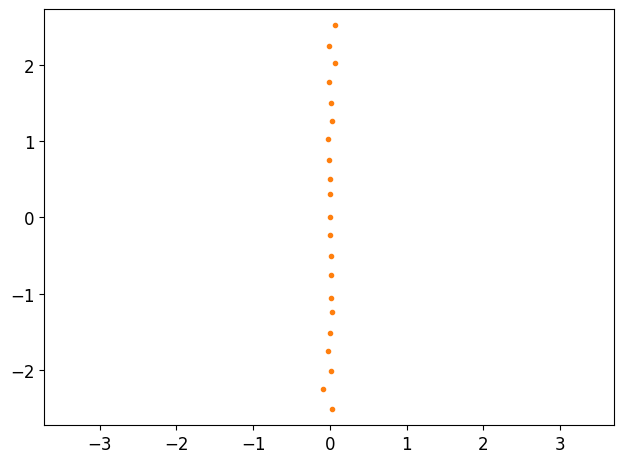

In [22]:
plt.plot(c_logs.squeeze().detach().numpy()[:,0], c_logs.squeeze().detach().numpy()[:,1], '.', color=colors[1])
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"logs_on_c_M.eps"))
plt.show()

In [23]:
# low rank approximation
noisy_c_data = circle(250, noise=0.1)

c_z = c_z3

# construct CC-RAE from test data

# i) rank 1 approximation
c_R_z, c_U = naive_low_rank_approximation(c_M, c_z, c_data, 1)
c_w_z = c_R_z / c_M.norm(c_z, c_R_z[None])[:,None]

# ii) construct CC-RAE
c_rae_w_z = Curvature_Corrected_Riemannian_Autoencoder(c_M, c_z, c_w_z)

# project noisy validation data onto manifold with RAE
projected_c_mesh = c_rae_w_z.project_on_manifold(noisy_c_data)

# compute error
error_projected_c_mesh = torch.norm(projected_c_mesh - noisy_c_data, 2, -1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


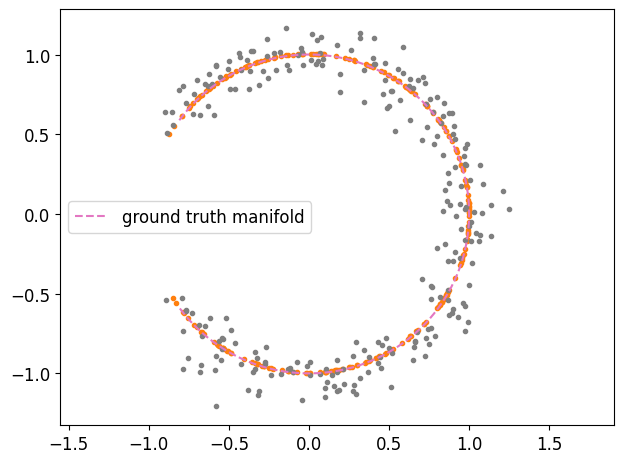

average error = 0.07975319027900696 \pm 0.06013652682304382


In [24]:
# plot rae projections
plt.plot(projected_c_mesh.cpu().detach().numpy()[:,0], projected_c_mesh.cpu().detach().numpy()[:,1], '.', color=colors[1])

plt.plot(noisy_c_data[:,0], noisy_c_data[:,1], '.', color=colors[7])
plt.plot(c_data_manifold[:,0], c_data_manifold[:,1], "--", label="ground truth manifold", color=colors[6])
plt.legend()
plt.axis('equal')
plt.savefig(os.path.join(results_path,f"rae_projections_on_c_M.eps"))
plt.show()

# print errors
mean_c_rae_error = torch.mean(error_projected_c_mesh)
std_c_rae_error = torch.std(error_projected_c_mesh)
print(f"average error = {mean_c_rae_error.squeeze().detach().numpy()} \pm {std_c_rae_error.squeeze().detach().numpy()}")